# Klasyfikacja cyfr MNIST w TensorFlow
Zanim przejdziemy do sieci konwolucyjnych, zbudujemy prostą, w pełni połączoną sieć neuronową (ANN) w TensorFlow/Keras, aby sklasyfikować ręcznie pisane cyfry z zestawu MNIST.

## 1. Importy i konfiguracja
Wczytujemy TensorFlow oraz pomocnicze biblioteki do analizy wyników i wizualizacji.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


## 2. Wczytanie i przygotowanie danych
Keras udostępnia zestaw MNIST bezpośrednio. Normalizujemy piksele do zakresu `[0, 1]` oraz dzielimy część danych treningowych na walidację.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizacja
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Wydzielenie walidacji (10k próbek)
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

print('Rozmiar zbioru treningowego:', x_train.shape)
print('Rozmiar zbioru walidacyjnego:', x_val.shape)
print('Rozmiar zbioru testowego:', x_test.shape)


Rozmiar zbioru treningowego: (50000, 28, 28)
Rozmiar zbioru walidacyjnego: (10000, 28, 28)
Rozmiar zbioru testowego: (10000, 28, 28)


### Podgląd danych
Zobaczmy kilka przykładów cyfr, aby upewnić się, że dane wyglądają poprawnie.

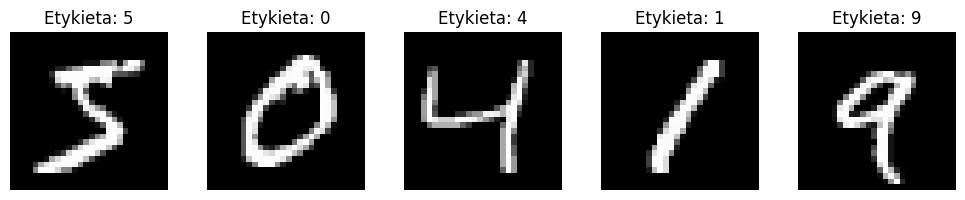

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for idx, ax in enumerate(axes):
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Etykieta: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## 3. Budowa modelu
Tworzymy prostą architekturę: warstwa spłaszczająca (`Flatten`), dwie warstwy gęste z aktywacją ReLU i dropoutem, a na końcu warstwa wyjściowa `Dense` z softmaxem.

In [4]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/Users/rkorzen/PycharmProjects/szkolenia/szkolenie_dl_04102025/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Trening
Trenujemy model przez 15 epok, korzystając z walidacji na wydzielonym zbiorze.

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/15
391/391 - 2s - 4ms/step - accuracy: 0.8745 - loss: 0.4160 - val_accuracy: 0.9571 - val_loss: 0.1513
Epoch 2/15
391/391 - 1s - 3ms/step - accuracy: 0.9459 - loss: 0.1804 - val_accuracy: 0.9699 - val_loss: 0.1024
Epoch 3/15
391/391 - 1s - 3ms/step - accuracy: 0.9592 - loss: 0.1341 - val_accuracy: 0.9729 - val_loss: 0.0903
Epoch 4/15
391/391 - 1s - 3ms/step - accuracy: 0.9677 - loss: 0.1074 - val_accuracy: 0.9746 - val_loss: 0.0813
Epoch 5/15
391/391 - 1s - 3ms/step - accuracy: 0.9715 - loss: 0.0914 - val_accuracy: 0.9767 - val_loss: 0.0775
Epoch 6/15
391/391 - 1s - 3ms/step - accuracy: 0.9753 - loss: 0.0796 - val_accuracy: 0.9791 - val_loss: 0.0705
Epoch 7/15
391/391 - 1s - 3ms/step - accuracy: 0.9776 - loss: 0.0705 - val_accuracy: 0.9786 - val_loss: 0.0747
Epoch 8/15
391/391 - 1s - 3ms/step - accuracy: 0.9790 - loss: 0.0647 - val_accuracy: 0.9799 - val_loss: 0.0706
Epoch 9/15
391/391 - 1s - 3ms/step - accuracy: 0.9812 - loss: 0.0580 - val_accuracy: 0.9795 - val_loss: 0.0683
E

### Krzywe uczenia
Wizualizacja przebiegu strat i dokładności pomaga ocenić, czy model uczy się stabilnie.

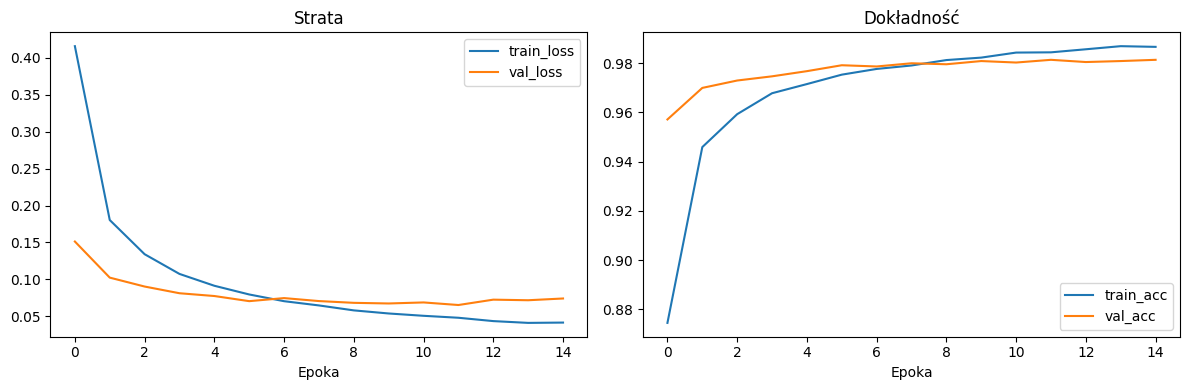

In [6]:
history_dict = history.history

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history_dict['loss'], label='train_loss')
axes[0].plot(history_dict['val_loss'], label='val_loss')
axes[0].set_title('Strata')
axes[0].set_xlabel('Epoka')
axes[0].legend()

axes[1].plot(history_dict['accuracy'], label='train_acc')
axes[1].plot(history_dict['val_accuracy'], label='val_acc')
axes[1].set_title('Dokładność')
axes[1].set_xlabel('Epoka')
axes[1].legend()

plt.tight_layout()
plt.show()


## 5. Ewaluacja na zbiorze testowym
Sprawdzamy, jak model generalizuje na wcześniej niewidzianych danych.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Strata testowa: {test_loss:.4f}')
print(f'Dokładność testowa: {test_acc:.4f}')


Strata testowa: 0.0717
Dokładność testowa: 0.9786


### Raport klasyfikacji
Dla kompletności generujemy raport klasyfikacji oraz macierz pomyłek.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



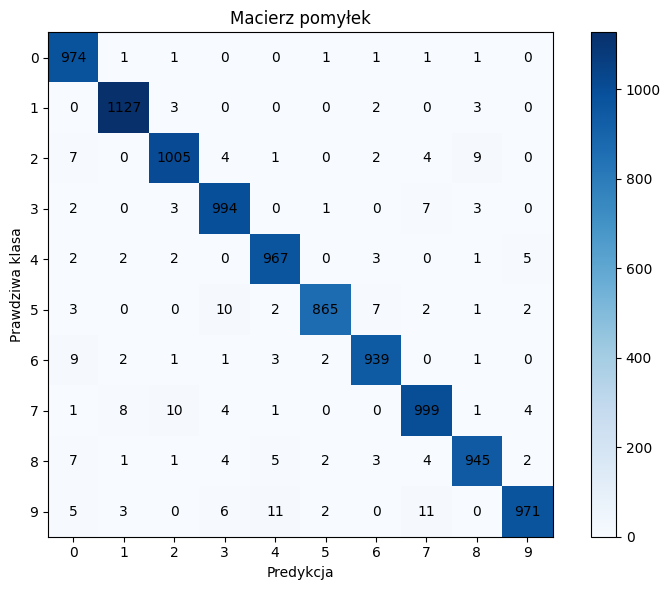

In [8]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')
ax.figure.colorbar(im, ax=ax)
ax.set_xlabel('Predykcja')
ax.set_ylabel('Prawdziwa klasa')
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_title('Macierz pomyłek')

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


## 6. Zapisywanie i wczytywanie modelu
Model możemy zapisać w formacie SavedModel lub HDF5 i później wczytać do dalszych eksperymentów.

In [9]:

model_path = 'mnist_ann_tf.keras'

model.save(model_path)

loaded_model = keras.models.load_model(model_path)
loaded_loss, loaded_acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f'Dokładność wczytanego modelu: {loaded_acc:.4f}')


Dokładność wczytanego modelu: 0.9786


## 7. Podsumowanie
1. Wczytaliśmy i przygotowaliśmy dane MNIST.
2. Zbudowaliśmy prostą sieć neuronową w TensorFlow/Keras.
3. Wytrenowaliśmy model, monitorując walidację.
4. Przeanalizowaliśmy wyniki na zbiorze testowym oraz wygenerowaliśmy raport klasyfikacji.
5. Zapisaliśmy i ponownie wczytaliśmy model, potwierdzając, że utrzymuje uzyskaną dokładność.

Taki pipeline będzie punktem odniesienia przed przejściem do bardziej zaawansowanych architektur CNN.